In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as pe
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose # for time series decomposition

In [2]:
df = pd.read_excel("Crude Oil Prices Daily.xlsx")
df

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9535,2023-09-12,93.58
9536,2023-09-13,93.04
9537,2023-09-14,95.20
9538,2023-09-15,95.55


In [3]:
#Separating Month and Year into Separate Column for Visualization for meaningful insight of the data
df["Date"]  = pd.to_datetime(df.Date, format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"]  = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Date,Closing Value,month,year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986
5,1986-01-09,26.03,Jan,1986
6,1986-01-10,25.65,Jan,1986
7,1986-01-13,25.08,Jan,1986
8,1986-01-14,24.97,Jan,1986
9,1986-01-15,25.18,Jan,1986


In [4]:
df1 = pd.read_excel("Crude Oil Prices Daily.xlsx",index_col=0,parse_dates=True)
df1

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2023-09-12,93.58
2023-09-13,93.04
2023-09-14,95.20


- convert Date column into index and parse_Date=True ,it means it will consider as data

# EDA

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9540 entries, 1986-01-02 to 2023-09-18
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Value  9534 non-null   float64
dtypes: float64(1)
memory usage: 149.1 KB


In [6]:
df1.isnull().sum()

Closing Value    6
dtype: int64

In [7]:
# to deal with missing values we can used interpolation technique i.e upsampling.
df1['Closing Value'].interpolate(method='linear', inplace=True)
df1.reset_index(drop=True, inplace=True)
print(df)


           Date  Closing Value month  year
0    1986-01-02          25.56   Jan  1986
1    1986-01-03          26.00   Jan  1986
2    1986-01-06          26.53   Jan  1986
3    1986-01-07          25.85   Jan  1986
4    1986-01-08          25.87   Jan  1986
...         ...            ...   ...   ...
9535 2023-09-12          93.58   Sep  2023
9536 2023-09-13          93.04   Sep  2023
9537 2023-09-14          95.20   Sep  2023
9538 2023-09-15          95.55   Sep  2023
9539 2023-09-18          95.95   Sep  2023

[9540 rows x 4 columns]


In [8]:
df1.isna().sum()

Closing Value    0
dtype: int64

In [9]:
df1.describe()

,Closing Value
count,9540.000000
mean,47.337807
std,30.149545
min,9.120000
25%,20.080000
50%,37.785000
75%,70.900000
max,145.310000


- we can observe,data is right skewed

In [10]:
# we have data from 1998 to 2023, 

In [11]:
df1['Closing Value'].value_counts()

20.38     13
18.63     13
18.69     12
20.28     12
19.84     10
          ..
139.69     1
139.96     1
141.06     1
143.74     1
95.20      1
Name: Closing Value, Length: 5410, dtype: int64

<AxesSubplot:>

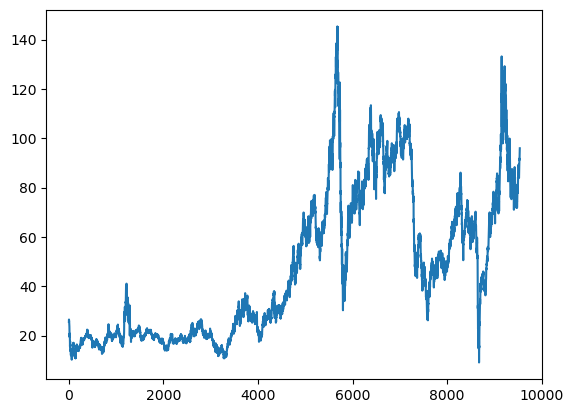

In [12]:
df1['Closing Value'].plot()

- we can observe in diagram we have data from 1988 to 2023 , data does'nt have any seasonality ,but data have exponential trend. we can say our data is non-stationary

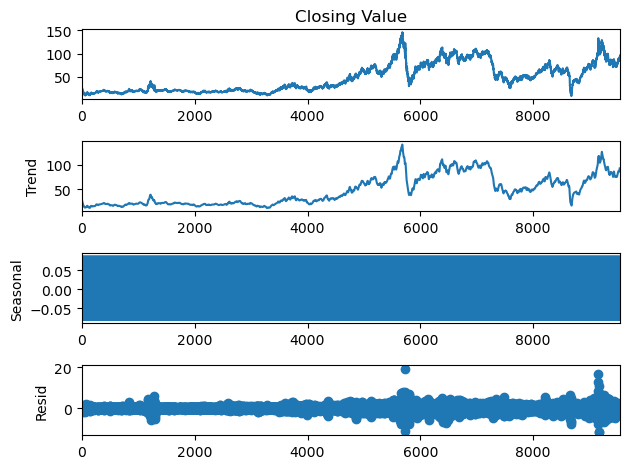

In [13]:
data = seasonal_decompose(df1['Closing Value'],period=12)
data.plot()
plt.show()

<AxesSubplot:xlabel='month', ylabel='Closing Value'>

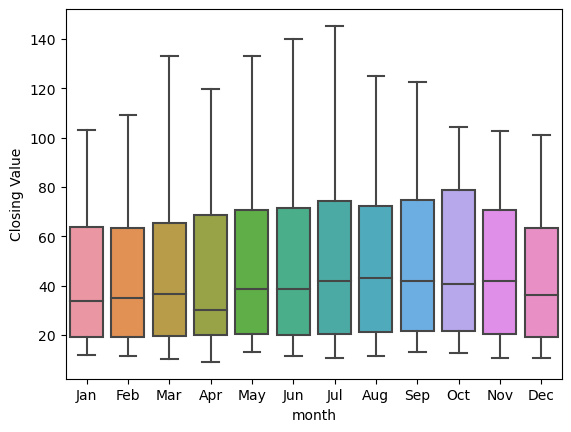

In [14]:
sns.boxplot(x ='month',y='Closing Value',data=df)

In [15]:
# To check Data is stationary or not we can  used Adfuller test
from statsmodels.tsa.stattools import adfuller
adfuller(df1['Closing Value'])[1]

0.25392582972832944

Null hypothesis: Data is Non stationary

Alternate Hypothesis: Data is Stationary

If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

According the p-value, the dataset is not stationary as the p is greater value is  than alpha value.

In [16]:
# to convert  non-stationary data into a stationary we have to perform differencing
df1['first_difference'] = df1['Closing Value'].diff()

<AxesSubplot:>

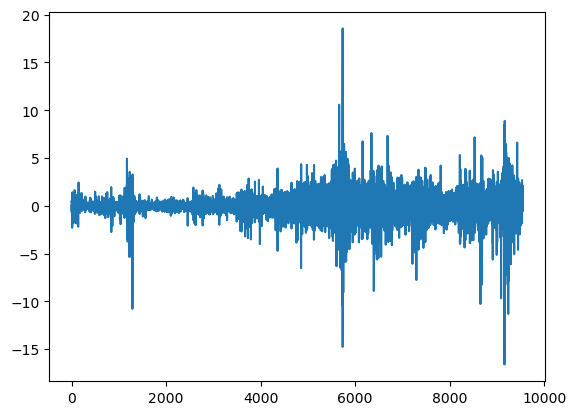

In [17]:
df1['first_difference'].plot()

<AxesSubplot:xlabel='first_difference', ylabel='Density'>

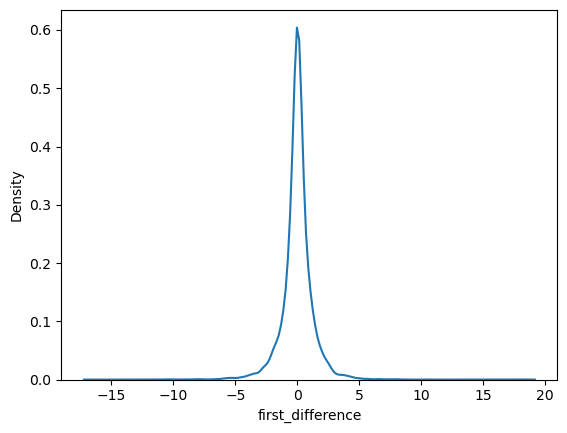

In [18]:
sns.kdeplot(df1['first_difference'])

- After differencing we can saw that our data is  normally distributed.

C:\Users\sanjana pal\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,)

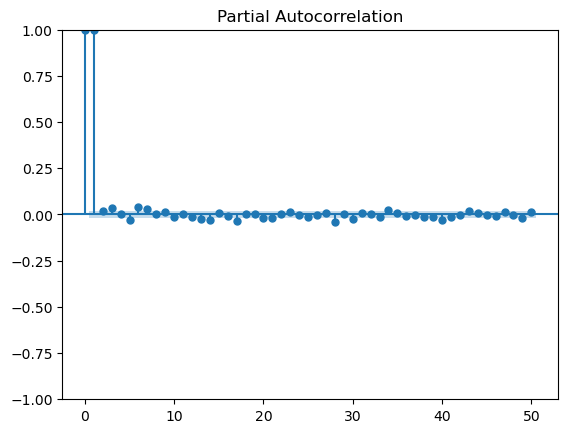

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(df1['Closing Value'],lags=50),
#plt.show()


- Pacf only shows which lag variable is directly afftecting the current variable

array([[<AxesSubplot:title={'center':'Closing Value'}>,
        <AxesSubplot:title={'center':'first_difference'}>]], dtype=object)

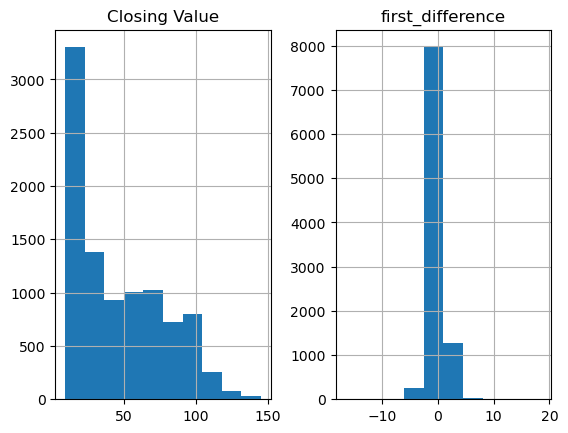

In [20]:
df1.hist()

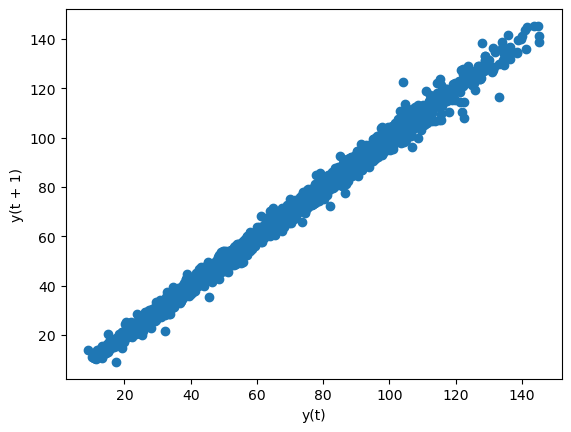

In [21]:
from pandas.plotting import lag_plot
lag_plot(df1['Closing Value'])
plt.show()

(<Figure size 640x480 with 1 Axes>,)

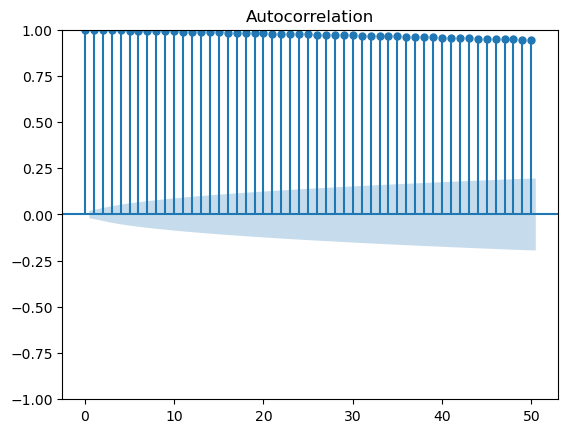

In [22]:
plot_acf(df1['Closing Value'],lags=50),

# MODEL BUILDING

In [23]:
#!pip install pmdarima

In [24]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose # For time series decomposition
from pmdarima import auto_arima

%matplotlib inline

In [25]:
from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [26]:
df1.drop('Closing Value',axis=1,inplace=True)

In [27]:
np.isnan(df1.any()) #and gets False
np.isfinite(df1.all()) #and gets True

first_difference    True
dtype: bool

In [28]:
df1.dropna(inplace=True)

In [29]:
train_data = df1.iloc[:len(df1) - 30]
test_data = df1.iloc[len(df1) - 30:]

# SARIMA MODEL

In [30]:
# Runs auto_arima function to get the parameters for the SARIMA model
opt_model = auto_arima(train_data, maxiter=100, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=31705.956, Time=10.97 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=31755.747, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=31753.711, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=31753.409, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31753.991, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=31746.609, Time=7.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=31745.890, Time=2.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=31706.962, Time=14.79 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=31706.925, Time=14.92 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=31749.311, Time=4.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=31748.069, Time=4.51 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=31747.260, Time=4.31 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=31708.137, Time=17.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=31704.206, Time=5.09 sec
 ARIMA(1,0,2)(0

C:\Users\sanjana pal\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sanjana pal\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sanjana pal\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sanjana pal\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


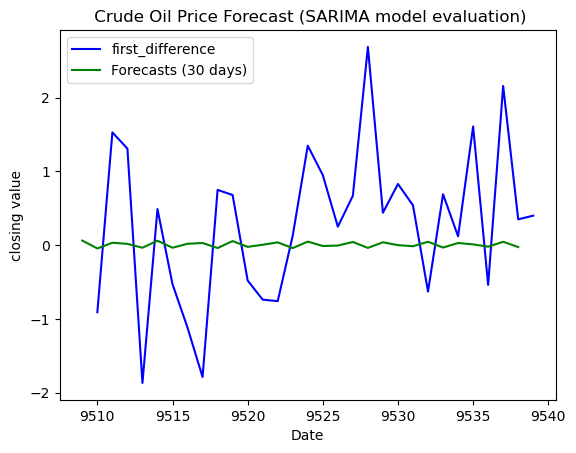

In [31]:
# Trains the model according to the auto_arima output -> (2,1,3)x(0,0,0,0)
sarima_model_eval = SARIMAX(train_data, order=(2, 1, 3), seasonal_order=(0, 0, 0, 0))
estimator_eval = sarima_model_eval.fit()

# Gets forecast for evaluation
preds = estimator_eval.forecast(len(test_data))

# Plot the results
test_data.plot(color='blue', label='Actual')
preds.plot(color='green', label='Forecasts (30 days)')

plt.title(' Crude Oil Price Forecast (SARIMA model evaluation)')
plt.xlabel('Date')
plt.ylabel('closing value')
plt.legend()
plt.show()

# MODEL EVALUTION

In [32]:
# To evaluate the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [33]:
rmse = np.sqrt(mean_squared_error(test_data.values, preds.values))
mae = mean_absolute_error(test_data.values, preds.values)
mape = mean_absolute_percentage_error(test_data.values, preds.values)

print('Root Mean Square Error (RMSE): {} \nMean Absolute Error (MAE): {} \nMean Absolute Percentage Error (MAPE): {}'. format(np.round(rmse, 3), np.round(mae, 3), np.round(mape, 3)))

Root Mean Square Error (RMSE): 1.098 
Mean Absolute Error (MAE): 0.914 
Mean Absolute Percentage Error (MAPE): 1.009


# Model Based approches

In [55]:
df2 = pd.read_excel("Crude Oil Prices Daily.xlsx")
df2

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9535,2023-09-12,93.58
9536,2023-09-13,93.04
9537,2023-09-14,95.20
9538,2023-09-15,95.55


<AxesSubplot:>

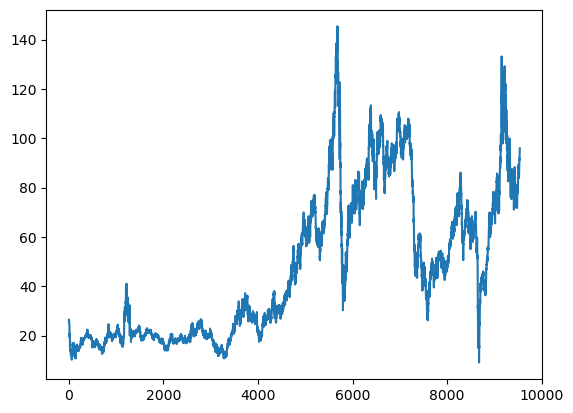

In [56]:
df2['Closing Value'].plot()

In [60]:
df2.rename(columns={'Closing Value':'closing_value'},inplace=True)

In [61]:
df2.shape

(9540, 2)

In [62]:
df2['t']= range(1,9541)
df2

,Date,closing_value,t
0,1986-01-02,25.56,1
1,1986-01-03,26.00,2
2,1986-01-06,26.53,3
3,1986-01-07,25.85,4
4,1986-01-08,25.87,5
...,...,...,...
9535,2023-09-12,93.58,9536
9536,2023-09-13,93.04,9537
9537,2023-09-14,95.20,9538
9538,2023-09-15,95.55,9539


In [64]:
df2['t_square'] = df2['t']**2

In [65]:
df2['log_closing_value'] = np.log(df2['closing_value'])

In [66]:
#convert Date column into datetime object
df2['Date']= pd.to_datetime(df2['Date'])

In [67]:
dummy_months = pd.get_dummies(df2['Date'].dt.month,prefix='Month')

In [68]:
dummy_months = dummy_months.astype(int)

In [70]:
df2 = pd.concat([df2,dummy_months],axis=1)
df2

,Date,closing_value,t,t_square,log_closing_value,Month_1,Month_2,Month_3,Month_4,Month_5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1986-01-02,25.56,1,1,3.241029,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1986-01-03,26.00,2,4,3.258097,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1986-01-06,26.53,3,9,3.278276,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1986-01-07,25.85,4,16,3.252311,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1986-01-08,25.87,5,25,3.253084,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,2023-09-12,93.58,9536,90935296,4.538817,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9536,2023-09-13,93.04,9537,90954369,4.533030,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9537,2023-09-14,95.20,9538,90973444,4.555980,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9538,2023-09-15,95.55,9539,90992521,4.559650,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
df2["year"] = df2['Date'].dt.strftime("%Y")

<AxesSubplot:xlabel='year', ylabel='closing_value'>

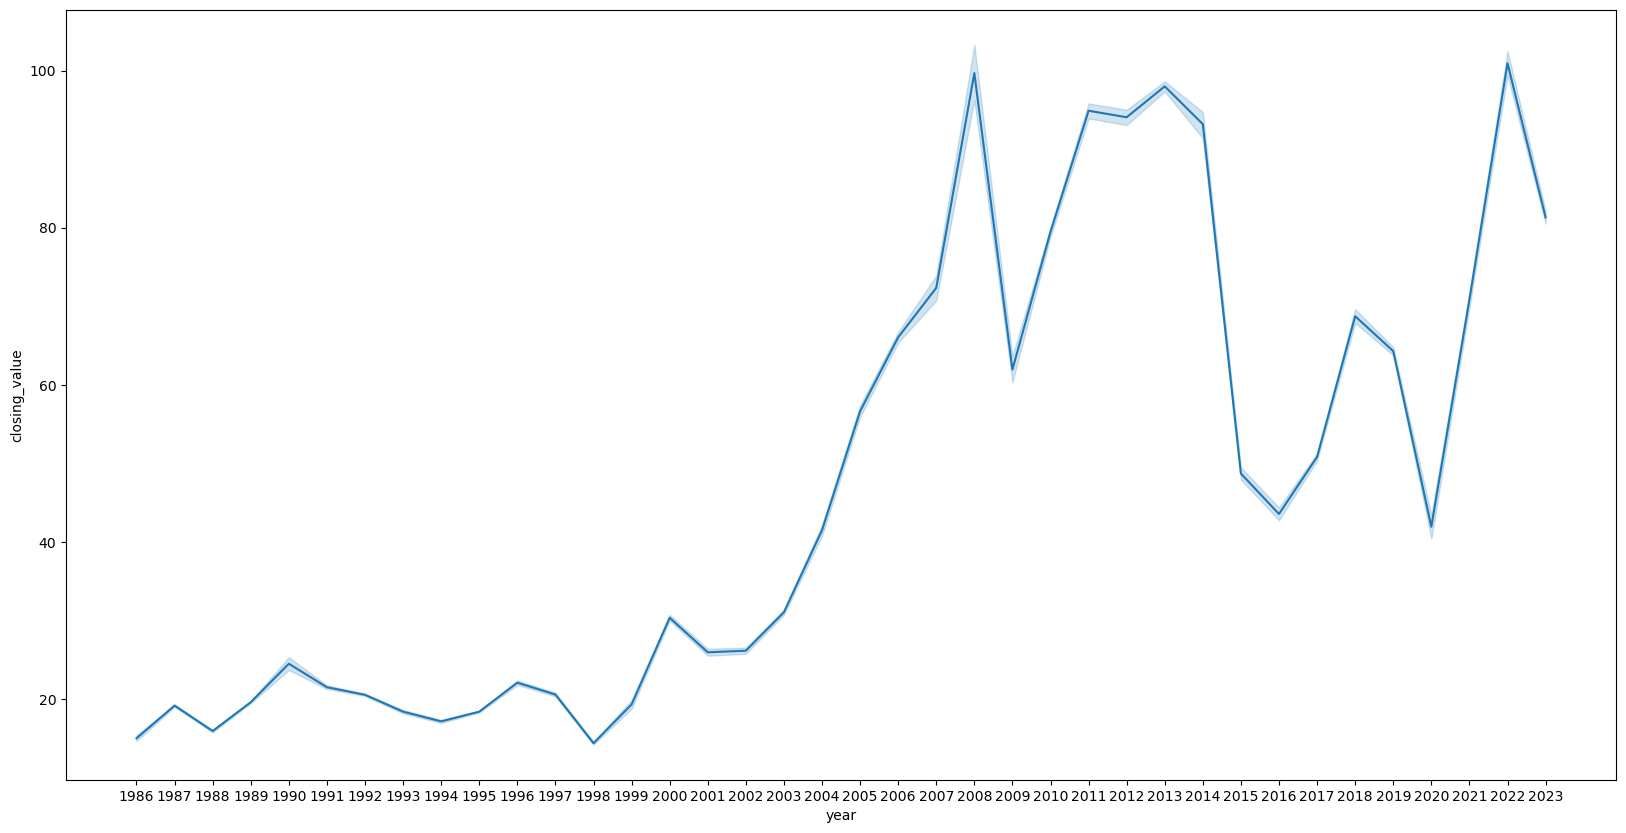

In [76]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df2,x='year',y ='closing_value')

In [83]:
df2.dropna(inplace=True)

# Splitting Data

In [86]:
train = df2.head(8000)
test = df2.tail(1540)

In [88]:
train

,Date,closing_value,t,t_square,log_closing_value,Month_1,Month_2,Month_3,Month_4,Month_5,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,year
0,1986-01-02,25.56,1,1,3.241029,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986
1,1986-01-03,26.00,2,4,3.258097,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986
2,1986-01-06,26.53,3,9,3.278276,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986
3,1986-01-07,25.85,4,16,3.252311,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986
4,1986-01-08,25.87,5,25,3.253084,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2017-08-24,47.43,7996,63936016,3.859255,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
7996,2017-08-25,47.87,7997,63952009,3.868489,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
7997,2017-08-28,46.57,7998,63968004,3.840957,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
7998,2017-08-29,46.44,7999,63984001,3.838161,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017


In [87]:
test

,Date,closing_value,t,t_square,log_closing_value,Month_1,Month_2,Month_3,Month_4,Month_5,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,year
7994,2017-08-23,48.41,7995,63920025,3.879706,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
7995,2017-08-24,47.43,7996,63936016,3.859255,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
7996,2017-08-25,47.87,7997,63952009,3.868489,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
7997,2017-08-28,46.57,7998,63968004,3.840957,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
7998,2017-08-29,46.44,7999,63984001,3.838161,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,2023-09-12,93.58,9536,90935296,4.538817,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2023
9536,2023-09-13,93.04,9537,90954369,4.533030,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2023
9537,2023-09-14,95.20,9538,90973444,4.555980,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2023
9538,2023-09-15,95.55,9539,90992521,4.559650,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2023


# Model Building

In [89]:
# linear equation
import statsmodels.formula.api as smf

linear_model = smf.ols('closing_value~t',data=train).fit()
pred_linear = linear_model.predict(pd.DataFrame(test['t']))
rmse_linear = np.sqrt(mean_squared_error(test['closing_value'],pred_linear))
rmse_linear

27.19901137109326

In [100]:
# expoenetial
exponential = smf.ols('log_closing_value~t',data=train).fit()
pred_exp = exp.predict(pd.DataFrame(test['t']))
rmse_exp = np.sqrt(mean_squared_error(test['log_closing_value'],pred_exp))
rmse_exp

0.564167085277553

In [92]:
# Quadratic
Quad = smf.ols('closing_value~t+t_square',data=train).fit()
pred_quad = Quad.predict(pd.DataFrame(test[["t","t_square"]]))
rmse_quad = np.sqrt(mean_squared_error(test['closing_value'],pred_quad))
rmse_quad

31.79501896535046

In [93]:
# Additive seasonality
Add_sea = smf.ols('closing_value~Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=train).fit()
pred_add_sea = Add_sea.predict(pd.DataFrame(test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11']]))
rmse_add_sea = np.sqrt(mean_squared_error(test['closing_value'],pred_add_sea))
rmse_add_sea

33.39757573416221

In [95]:
# Additive Seasonality Quadratic
Add_sea_qu = smf.ols('closing_value~t+t_square+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=train).fit()
pred_add_sea_qu = Add_sea_qu.predict(pd.DataFrame(test[['t','t_square','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11']]))
rmse_add_sea_qu = np.sqrt(mean_squared_error(test['closing_value'],pred_add_sea_qu))
rmse_add_sea_qu

31.766191374177208

In [96]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_closing_value~t++Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=train).fit()
pred_Mul_sea = Mul_sea.predict(pd.DataFrame(test[['t','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11']]))
rmse_Mul_sea = np.sqrt(mean_squared_error(test['closing_value'],pred_Mul_sea))
rmse_Mul_sea

68.07282313363866

In [97]:
# Comparing the result
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_qu","rmse_Mul_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_qu,rmse_Mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_exp,0.564167
0,rmse_linear,27.199011
4,rmse_add_sea_qu,31.766191
2,rmse_quad,31.795019
3,rmse_add_sea,33.397576
5,rmse_Mul_sea,68.072823


- lowest RMSE value is in exponential model.

In [99]:
import pickle

In [101]:
with open('exponential_model.pkl', 'wb') as model_file:
    pickle.dump(exponential, model_file)